In [114]:
import cv2
import requests # For reading image from URL
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import numpy as np

def download_image_from_url(url):
    filename, ext = url.split("/")[-1].split(".")
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200 indicates success)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        # Specify the path where you want to save the image
        save_path = f"{filename}.{ext}"  # Replace with the desired file name and location
        # Open a binary file in write mode and write the image data to it
        with open(save_path, "wb") as file:
            file.write(image_data)
        print(f"Image downloaded and saved as {save_path}")
        return cv2.imread(save_path)
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال اول-الف</dir>
</b>
</font>



In [115]:
import cv2
import matplotlib.pyplot as plt

# Plot rgb histogram
def plot_rgb_histogram(image):
    plt.figure(figsize=(15, 5))

    # Split the image into its three channels: red, green, and blue
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Calculate histograms for each channel
    hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
    hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])

    # Plot histograms for each channel on the same figure
    plt.plot(hist_red, color='red', label='Red Channel')
    plt.plot(hist_green, color='green', label='Green Channel')
    plt.plot(hist_blue, color='blue', label='Blue Channel')

    plt.title('RGB Histograms')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Calculate contrast information for each channel
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel = image[:, :, i]
        dynamic_range = np.count_nonzero(cv2.calcHist([channel], [0], None, [256], [0, 256]))
        min_val, max_val, _, _ = cv2.minMaxLoc(channel)
        contrast = max_val - min_val

        # Set color for text based on the channel
        text_color = color.lower()

        plt.text(0.5, 0.8 - 0.15 * i, f'{color} Channel', fontsize=10, color=text_color, transform=plt.gca().transAxes)
        plt.text(0.5, 0.75 - 0.15 * i, f'Dynamic Range: {dynamic_range}', fontsize=10, color=text_color, transform=plt.gca().transAxes)
        plt.text(0.5, 0.7 - 0.15 * i, f'Contrast: {contrast:.2f}', fontsize=10, color=text_color, transform=plt.gca().transAxes)

    plt.show()




# Plot gray histogram
def plot_gray_histogram(image):
    plt.figure(figsize=(10, 5))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist, color='black')
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Calculate the dynamic range
    dynamic_range = np.count_nonzero(hist)
    plt.text(0.5, 0.85, f'Dynamic Range: {dynamic_range}', fontsize=12, color='black', transform=plt.gca().transAxes)

    # Calculate contrast (using minMaxLoc)
    min_val, max_val, _, _ = cv2.minMaxLoc(gray_image)
    contrast = max_val - min_val
    plt.text(0.5, 0.8, f'Contrast: {contrast:.2f}', fontsize=12, color='black', transform=plt.gca().transAxes)

    plt.show()


Image downloaded and saved as A.jpg


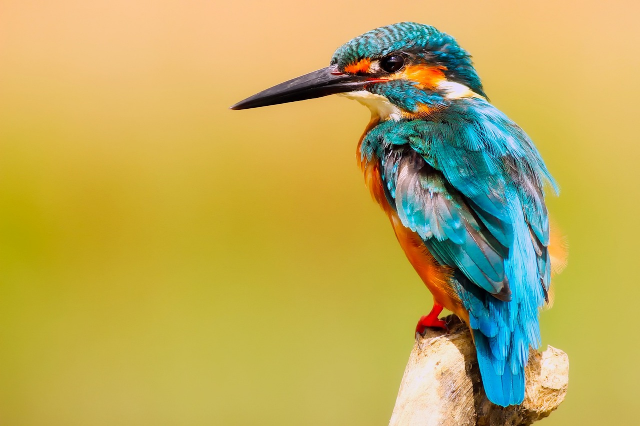

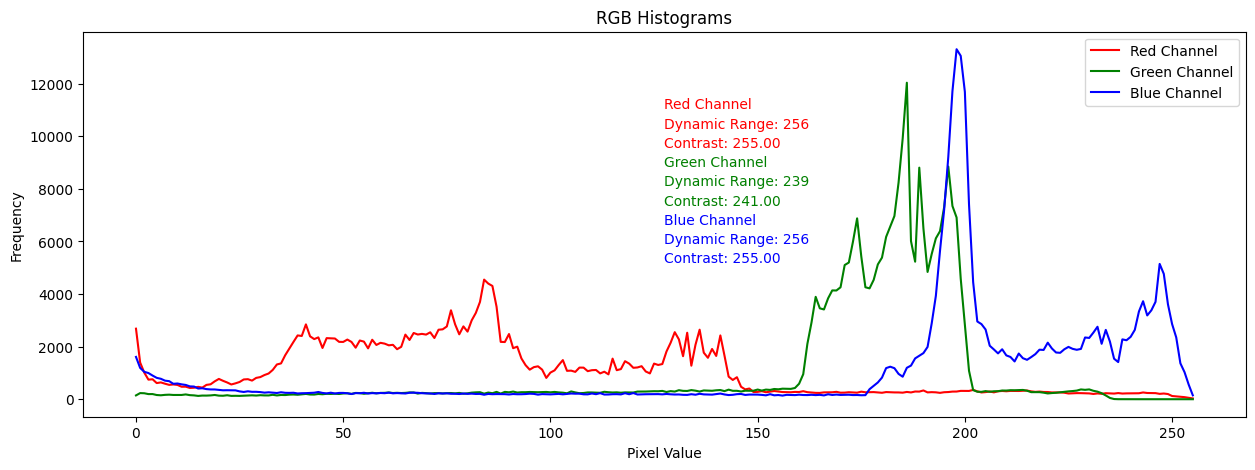

In [116]:
# Load the input image
download_image_from_url("https://i.ibb.co/tYkStWD/A.jpg")
original_image_path = '/content/A.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

# Display the original image
cv2_imshow(image)

plot_rgb_histogram(image)


Image downloaded and saved as img.jpg


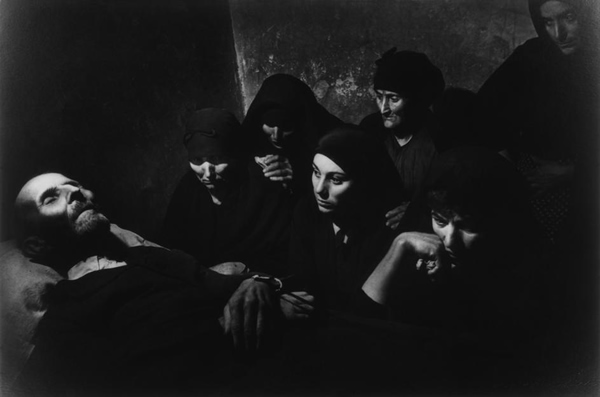

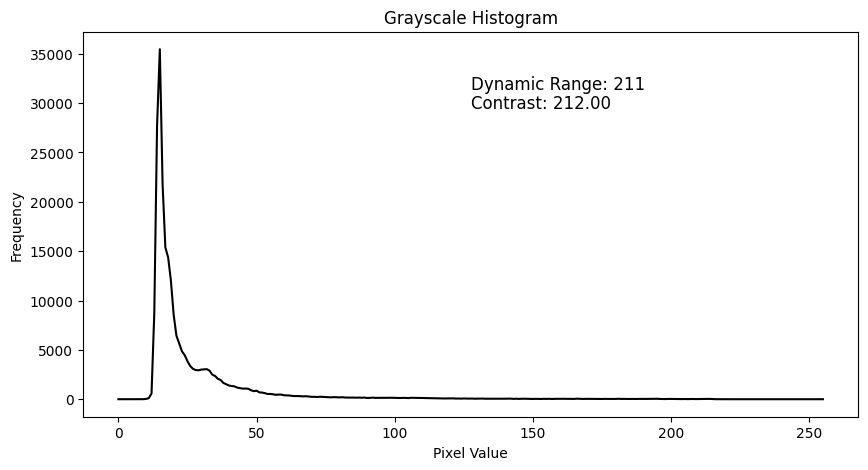

In [117]:
# Load the input image
download_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")
original_image_path = '/content/img.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 1, height // 1), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

plot_gray_histogram(image)

Image downloaded and saved as B.jpg


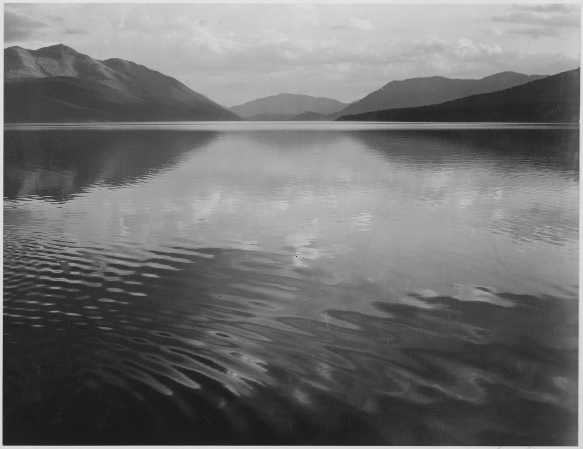

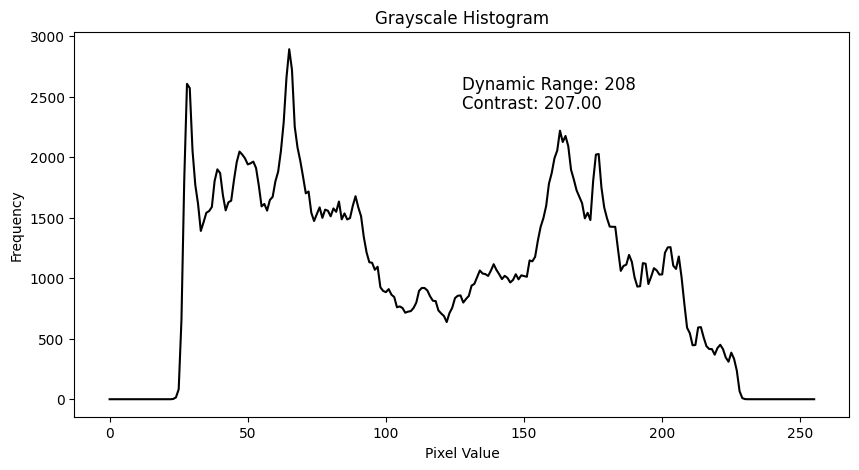

In [118]:
# Load the input image
download_image_from_url("https://i.ibb.co/7C0HcYV/B.jpg")
original_image_path = '/content/B.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

plot_gray_histogram(image)


<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال اول-ب</dir>
</b>
</font>


Image downloaded and saved as negative.png


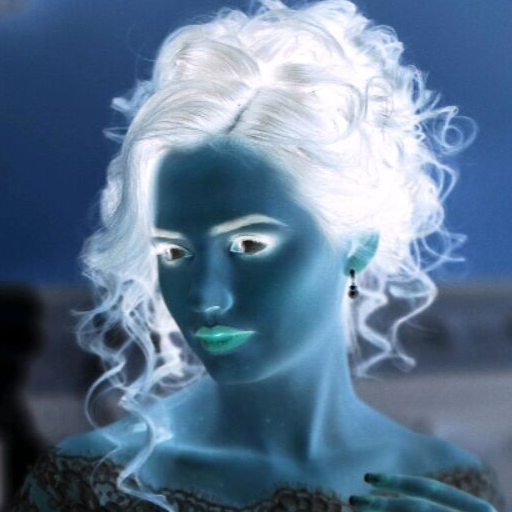

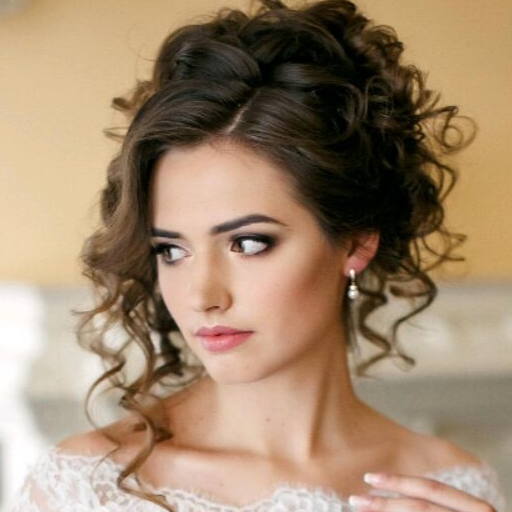

In [119]:
def negative_transformation(image):
    # Calculate L (number of intensity levels)
    L = 256

    # Apply negative transformation
    negative_image = L - 1 - image

    return negative_image

# Load the input image
download_image_from_url("https://i.ibb.co/pnFJy5w/negative.png")
original_image_path = '/content/negative.png'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Apply negative transformation
negative_image = negative_transformation(image)

# Display the negative image
cv2_imshow(negative_image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال دوم-الف</dir>
</b>
</font>


Image downloaded and saved as Image.jpg


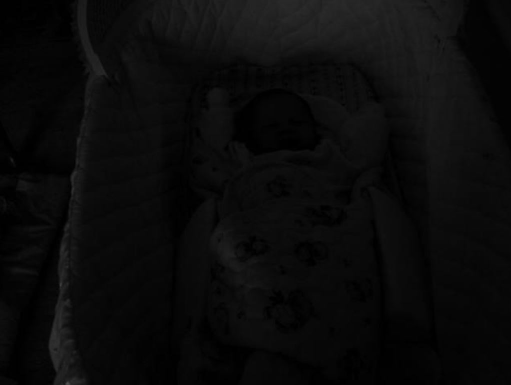

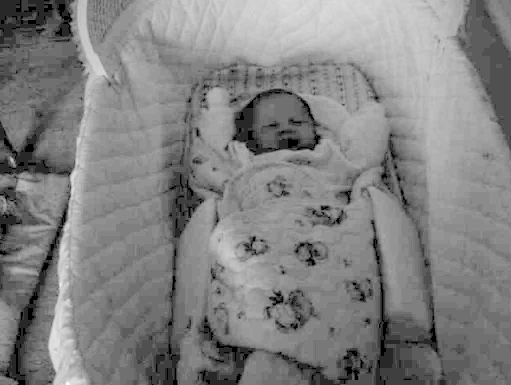

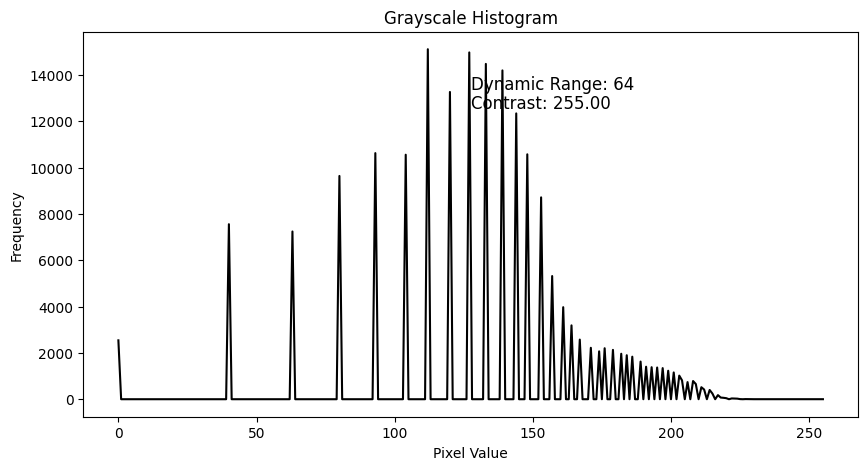

In [120]:
def logarithmic_transformation(image):
    # Calculate c
    c = 255 / np.log(256)

    # Apply logarithmic transformation
    log_transformed_image = c * np.log(1 + image)

    # Normalize to the range [0, 255]
    log_transformed_image = (log_transformed_image / np.max(log_transformed_image)) * 255

    # Convert to uint8 type
    log_transformed_image = np.uint8(log_transformed_image)

    return log_transformed_image

# Load the input image
download_image_from_url("https://i.ibb.co/8Pkw5F4/Image.jpg")
original_image_path = '/content/Image.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
# Display the original image
cv2_imshow(image)

# Apply logarithmic transformation
log_transformed_image = logarithmic_transformation(image)

# Display the log-transformed image
cv2_imshow(log_transformed_image)

# Plot the histogram of the log-transformed image
plot_gray_histogram(log_transformed_image)


<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال دوم-ب</dir>
</b>
</font>

In [121]:
def histogram_stretching(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Calculate min and max values
    min_val = np.min(gray_image)
    max_val = np.max(gray_image)

    # Perform histogram stretching
    stretched_image = ((gray_image - min_val) / (max_val - min_val)) * 255

    # Convert to uint8 type
    stretched_image = np.uint8(stretched_image)

    # If it's a color image, apply stretching to each channel separately
    if len(image.shape) == 3:
        stretched_image = cv2.merge([stretched_image, stretched_image, stretched_image])

    return stretched_image

In [122]:
def histogram_equalization(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    #convert to NumPy array
    img_array = np.asarray(gray_image)

    ##################################
    # PERFORM HISTOGRAM EQUALIZATION #
    ##################################

    """
    STEP 1: Normalized cumulative histogram
    """
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)

    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels

    #normalized cumulative histogram
    chistogram_array = np.cumsum(histogram_array)


    """
    STEP 2: Pixel mapping lookup table
    """
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


    """
    STEP 3: Transformation
    """
    # flatten image array into 1D list
    img_list = list(img_array.flatten())

    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]

    # reshape and write back into img_array
    eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape).astype(np.uint8)

    # Convert NumPy array to OpenCV image
    equalized_image = cv2.merge([eq_img_array, eq_img_array, eq_img_array]) if len(image.shape) == 3 else eq_img_array

    return equalized_image

Image downloaded and saved as Image.jpg


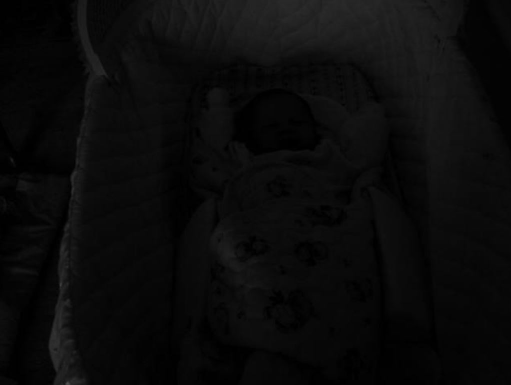

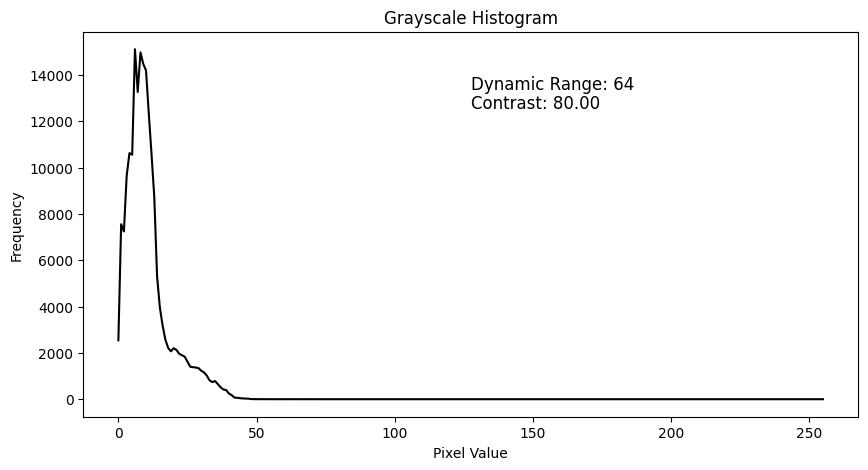

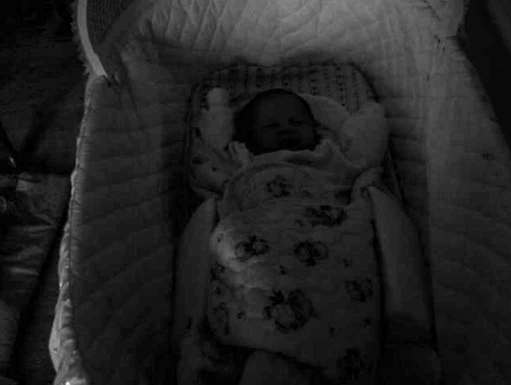

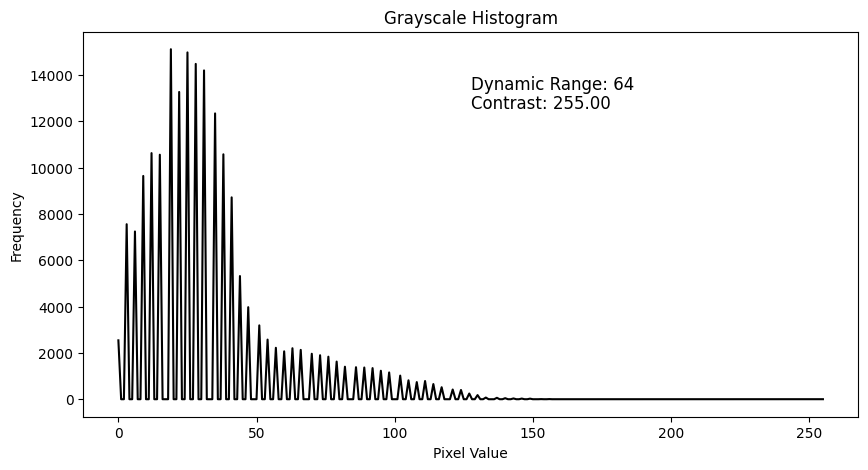

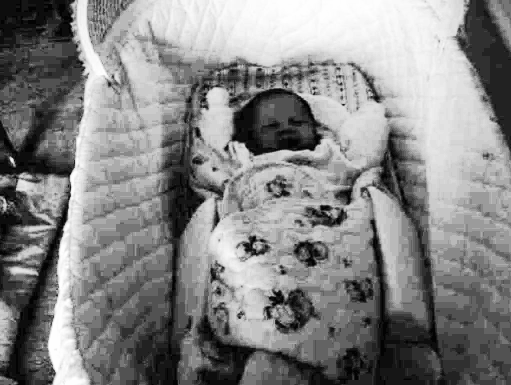

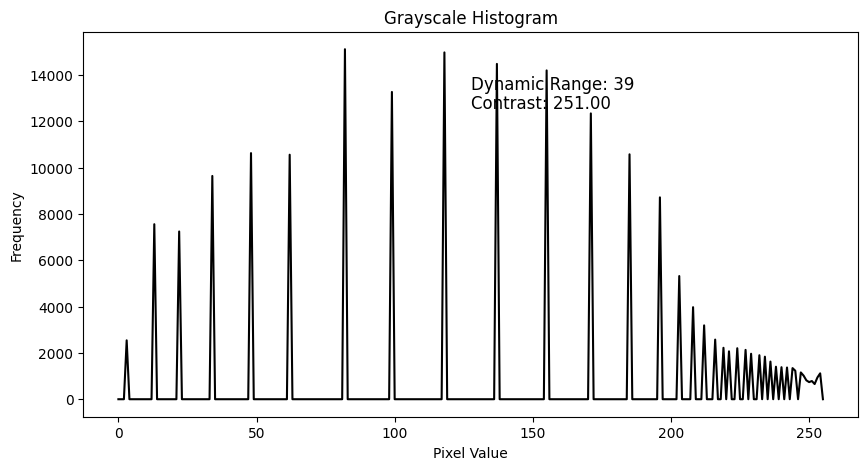

In [123]:
# Load the input image
download_image_from_url("https://i.ibb.co/8Pkw5F4/Image.jpg")
original_image_path = '/content/Image.jpg'
image = cv2.imread(original_image_path)
height, width, _ = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

# Display the original image
cv2_imshow(image)
# Plot the histogram of the original image
plot_gray_histogram(image)



# Apply histogram stretching
stretched_image = histogram_stretching(image)
# Display the stretched image
cv2_imshow(stretched_image)
# Plot the histogram of the stretched image
plot_gray_histogram(stretched_image)



# Apply histogram equalization
equalized_image = histogram_equalization(image)
# Display the equalized image
cv2_imshow(equalized_image)
# Plot the histogram of the equalized image
plot_gray_histogram(equalized_image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال سوم-الف</dir>
</b>
</font>

In [124]:
def apply_custom_filter(image, kernel):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply the custom filter using cv2.filter2D
    filtered_image = cv2.filter2D(gray_image, -1, kernel)

    return filtered_image

Image downloaded and saved as D.jpg


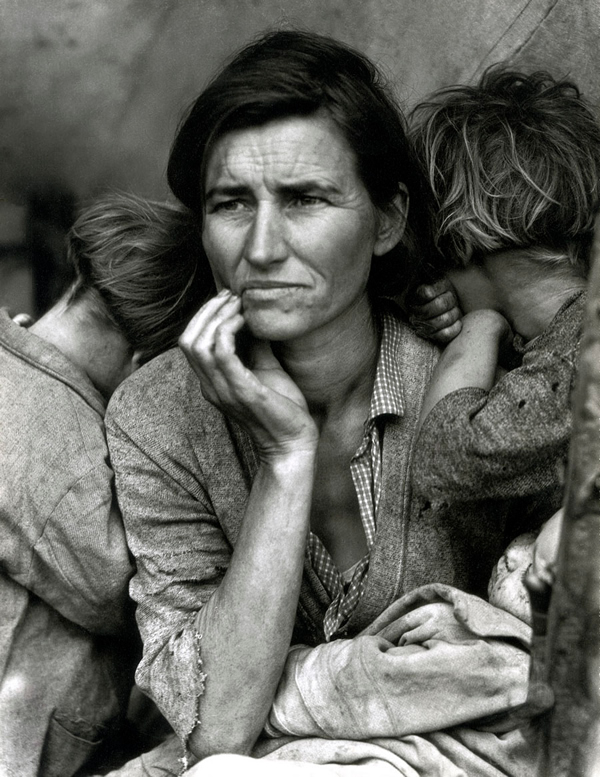

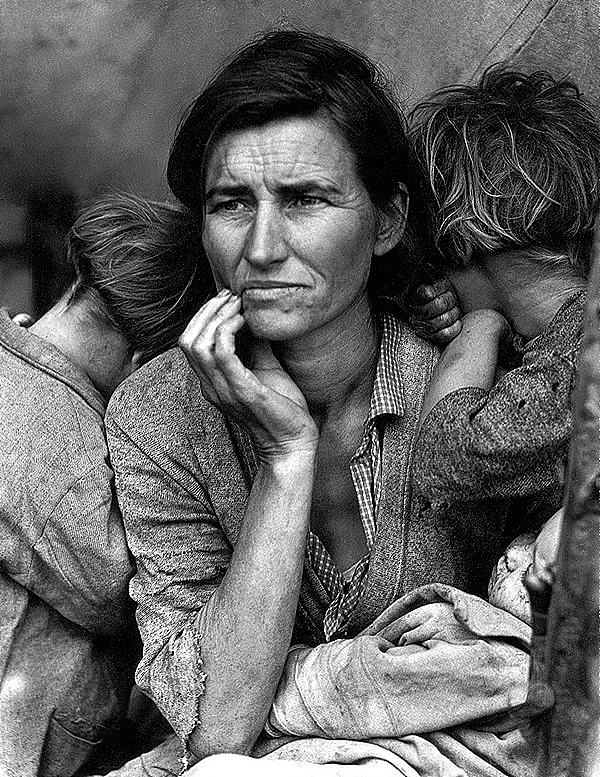

Before: 88, After: 0
Before: 3, After: 134
Before: 88, After: 74
Before: 0, After: 0
Before: 5, After: 188
Before: 86, After: 42
Before: 59, After: 0
Before: 57, After: 253
Before: 67, After: 0
Before: 32, After: 201


In [125]:
# Load the input image
download_image_from_url("https://i.ibb.co/QXQx81x/D.jpg")
original_image_path = '/content/D.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Define the custom kernel
custom_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Apply the custom filter
filtered_image = apply_custom_filter(image, custom_kernel)

# Display the filtered image
cv2_imshow(filtered_image)

# Compare values before and after applying the filter for ten random pixels
random_pixels = np.random.randint(0, filtered_image.size, 10)
for pixel in random_pixels:
    print(f"Before: {image.flatten()[pixel]}, After: {filtered_image.flatten()[pixel]}")

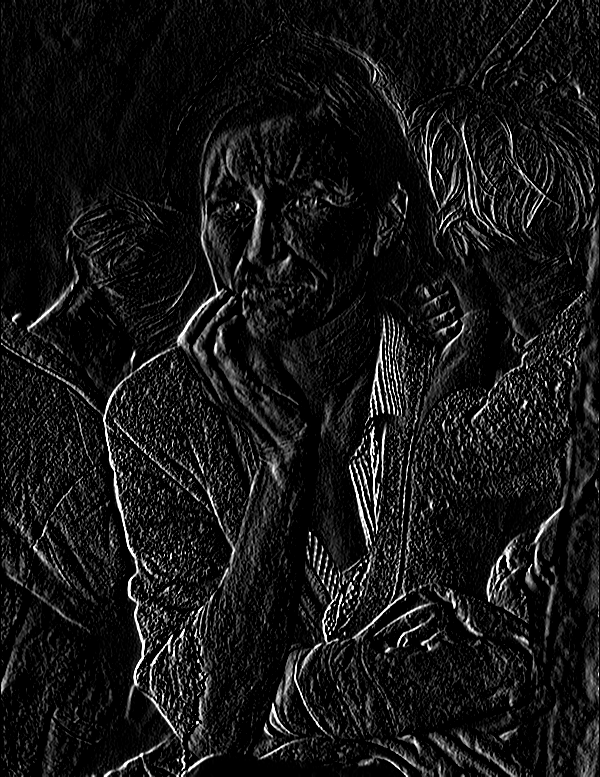

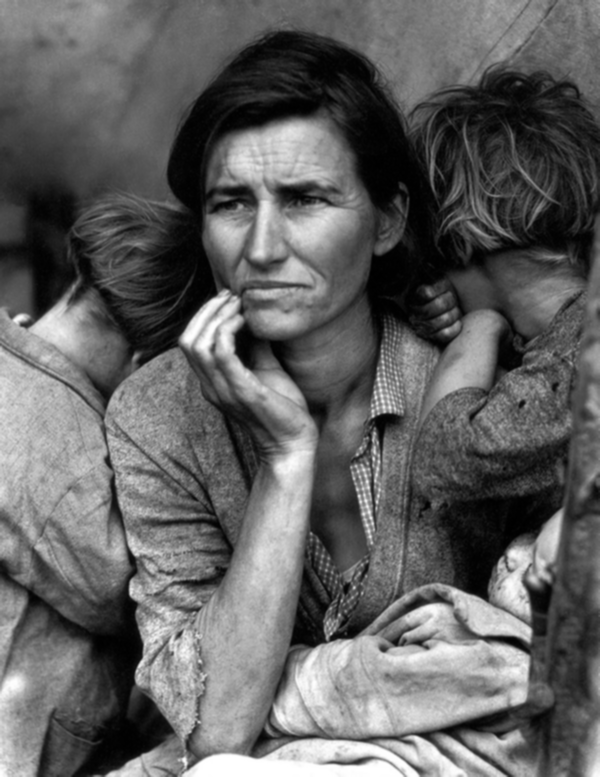

In [126]:
# Example of using the function with different kernels
# Define different kernels
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

gaussian_blur_kernel = (1/16) * np.array([[1, 2, 1],
                                          [2, 4, 2],
                                          [1, 2, 1]])

# Apply Sobel X filter
sobel_x_filtered_image = apply_custom_filter(image, sobel_x_kernel)
cv2_imshow(sobel_x_filtered_image)

# Apply Gaussian blur filter
gaussian_blur_filtered_image = apply_custom_filter(image, gaussian_blur_kernel)
cv2_imshow(gaussian_blur_filtered_image)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال سوم-ب</dir>
</b>
</font>

In [127]:
def apply_custom_average_filter(image, filter_dimensions):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Define the custom average filter kernel
    kernel_height, kernel_width = filter_dimensions
    kernel = np.ones((kernel_height, kernel_width), np.float32) / (kernel_height * kernel_width)

    # Apply the average filter using cv2.filter2D
    filtered_image = cv2.filter2D(gray_image, -1, kernel)

    return filtered_image

Image downloaded and saved as E.jpg


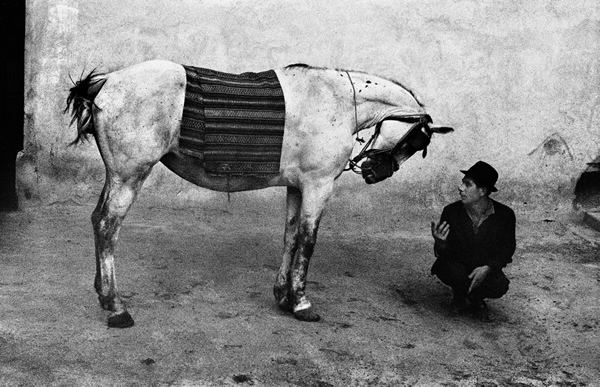

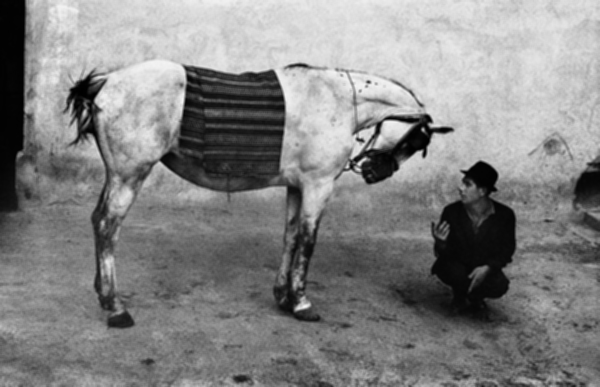

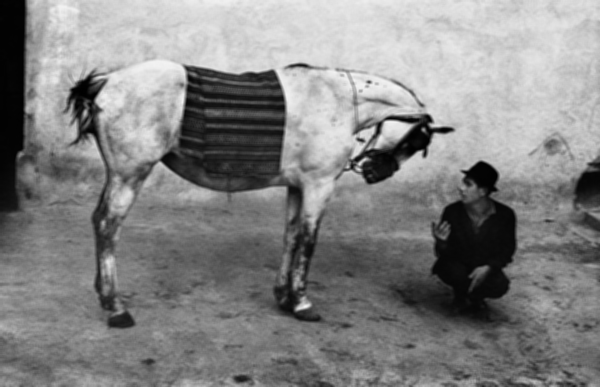

In [128]:
# Load the input image
download_image_from_url("https://i.ibb.co/sbtsv5z/E.jpg")
original_image_path = '/content/E.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Apply custom average filter with a 3x3 kernel
custom_average_filtered_image_3x3 = apply_custom_average_filter(image, (3, 3))
cv2_imshow(custom_average_filtered_image_3x3)

# Apply custom average filter with a 3x4 kernel
custom_average_filtered_image_3x4 = apply_custom_average_filter(image, (3, 4))
cv2_imshow(custom_average_filtered_image_3x4)

<font face="B Mitra" size=7>
<b>
<div dir="rtl">سوال چهارم</dir>
</b>
</font>

Image downloaded and saved as F.jpg


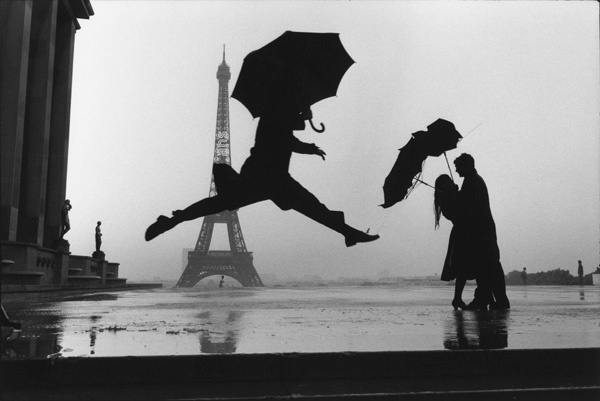

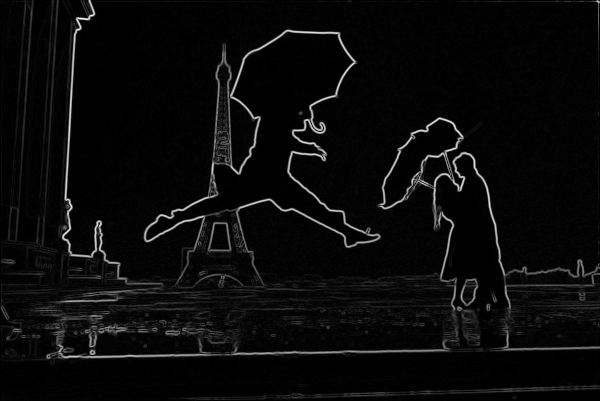

In [129]:
def sobel_edge_detection(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Sobel filter in the horizontal direction
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)

    # Apply Sobel filter in the vertical direction
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the results to get the final edge-detected image
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the values to the range [0, 255]
    sobel_edges = np.uint8(255 * sobel_edges / np.max(sobel_edges))

    return sobel_edges

# Load the input image
download_image_from_url("https://i.ibb.co/KXZrVWz/F.jpg")
original_image_path = '/content/F.jpg'
image = cv2.imread(original_image_path)

# Display the original image
cv2_imshow(image)

# Apply Sobel edge detection
sobel_edges = sobel_edge_detection(image)
cv2_imshow(sobel_edges)


<font face="B Mitra" size=6>
    <div dir="rtl">
        <b>
            سوبل
        </b>
    </div>
</font>

<font face="B Mitra" size=5>
    <b>
    <div dir="rtl">
           <p>
    در برخی مواقع ترکیب روش هاو الگوریتم های مختلف باعث بهبود نتایج بدست آمده خواهد شد.<br>
    در این الگوریتم سوبل را بر روی تصویر اعمال کنید. سپس یکی از روش های بهبود کنتراست را یر روی تصویر اعمال کرده و مجددا لبه یابی را انجام دهید. نتایج بدست آمده را با یکدیگر مقایسه کنید.
</p>
    </div>
    </b>
</font>

Image downloaded and saved as img.jpg


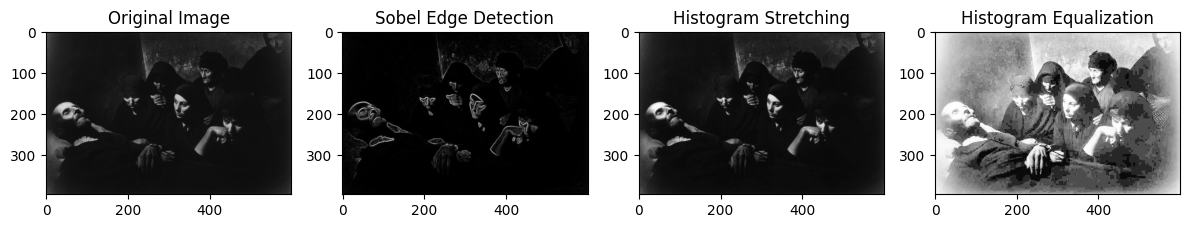

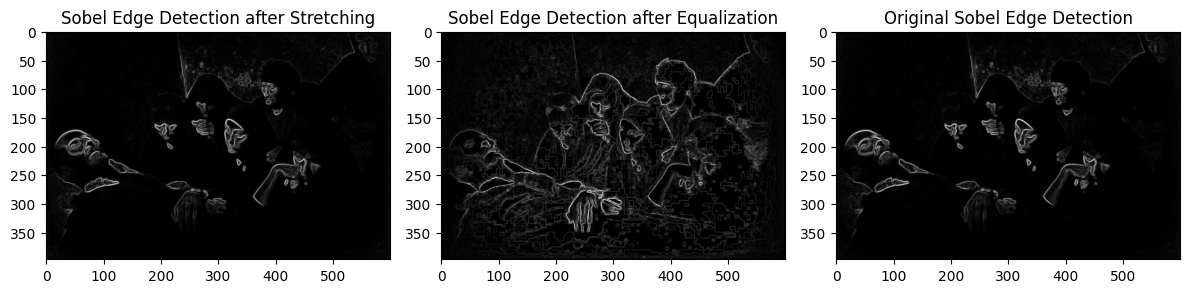

In [130]:
# Load the input image
download_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")
original_image_path = '/content/img.jpg'
image = cv2.imread(original_image_path)

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Apply Sobel edge detection
sobel_result = sobel_edge_detection(image)

# Display the Sobel edge detection result
plt.subplot(1, 4, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Edge Detection')

# Apply histogram stretching
stretched_image = histogram_stretching(image)

# Display the stretched image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB))
plt.title('Histogram Stretching')

# Apply histogram equalization
equalized_image = histogram_equalization(image)

# Display the equalized image
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Histogram Equalization')

plt.tight_layout()
plt.show()

# Sobel edge detection after contrast enhancement
sobel_after_stretching = sobel_edge_detection(stretched_image)
sobel_after_equalization = sobel_edge_detection(equalized_image)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_after_stretching, cmap='gray')
plt.title('Sobel Edge Detection after Stretching')

plt.subplot(1, 3, 2)
plt.imshow(sobel_after_equalization, cmap='gray')
plt.title('Sobel Edge Detection after Equalization')

plt.subplot(1, 3, 3)
plt.imshow(sobel_result, cmap='gray')
plt.title('Original Sobel Edge Detection')

plt.tight_layout()
plt.show()


<font face="B Mitra" size=5>
<b>
<div dir="rtl">به وضوح مشخص است که بعد از اجرای Histogram Equalization و سپس اجرای دوبارهSobel Edge Detection به نتیجه بهتری رسیده ایم.


</dir>
</b>
</font>